In [3]:
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import vector2latex
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import QasmSimulator

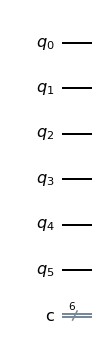

In [4]:
b = '101'
n = len(b)

simon_0 = QuantumCircuit(2*n, 2*n)
simon_0.draw(output="mpl")

In [6]:
sv = Statevector.from_label('000000')
sv_0 = sv.evolve(simon_0)
sv_0.draw(output='latex')

<IPython.core.display.Latex object>

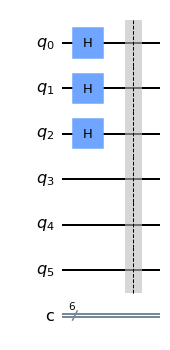

In [7]:
simon_1 = simon_0.copy('')
for i in range(n):
    simon_1.h(i)
simon_1.barrier()
simon_1.draw(output="mpl")

In [9]:
sv_1 = sv.evolve(simon_1)
sv_1.draw(output="latex")

<IPython.core.display.Latex object>

In [10]:
from qiskit_textbook.tools import simon_oracle

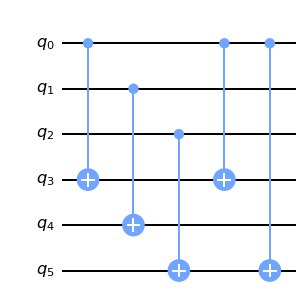

In [12]:
oracle = simon_oracle(b)
oracle.draw(output="mpl")

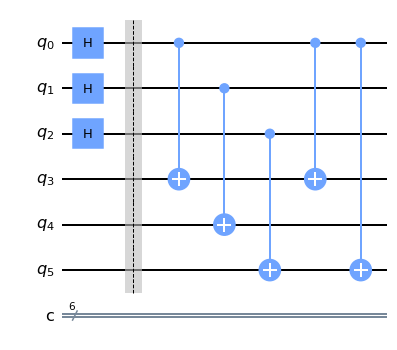

In [14]:
simon_2 = simon_1.copy('')
simon_2.compose(oracle, inplace=True)
simon_2.draw(output="mpl")

In [15]:
sv2 = sv.evolve(simon_2)
sv2.draw(output="latex")

<IPython.core.display.Latex object>

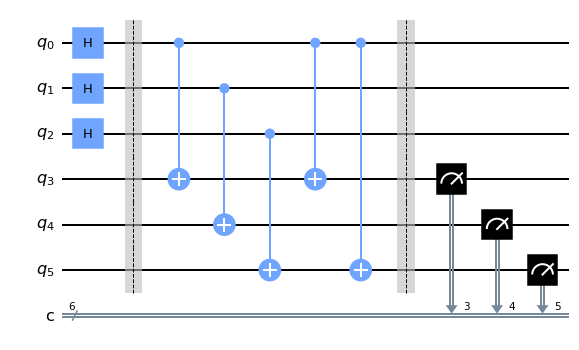

In [18]:
simon_3 = simon_2.copy('')
simon_3.barrier()

for i in range(n, 2*n):
    simon_3.measure(i, i)
simon_3.draw(output="mpl")

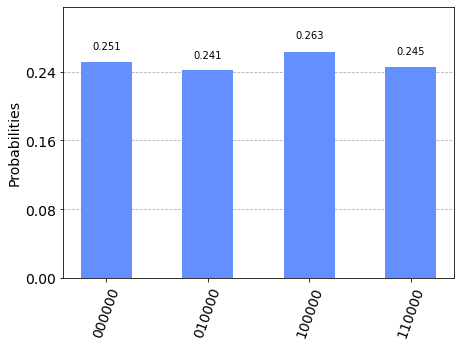

In [20]:
backend = QasmSimulator()
qc_compiled = transpile(simon_3, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)

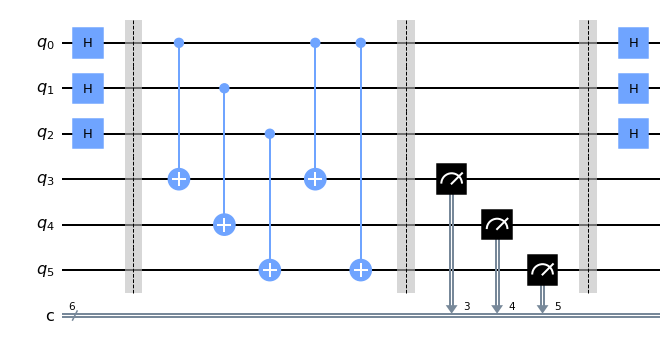

In [21]:
simon_4 = simon_3.copy('')
simon_4.barrier()
for i in range(n):
    simon_4.h(i)
simon_4.draw(output='mpl')

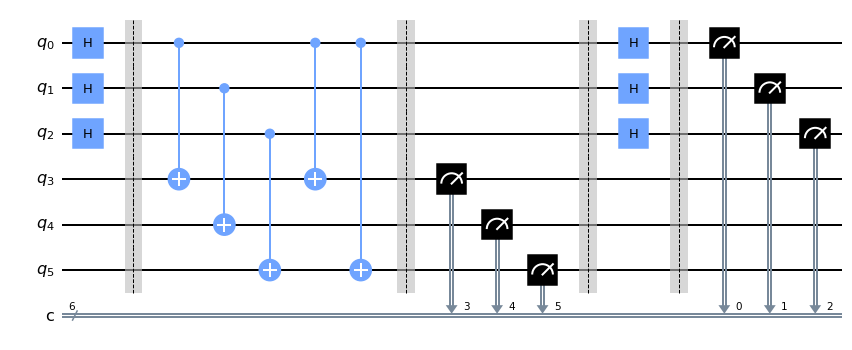

In [23]:
simon_5 = simon_4.copy('')
simon_5.barrier()

for i in range(n):
    simon_5.measure(i, i)
simon_5.draw(output="mpl")

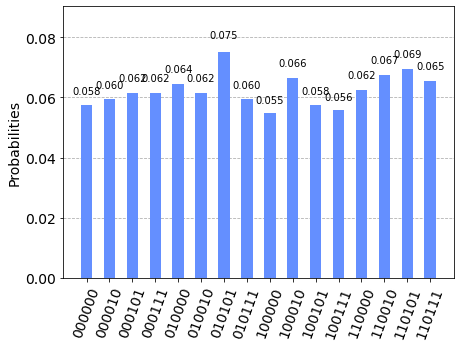

In [25]:
backend = QasmSimulator()
qc_compiled = transpile(simon_5, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)